In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
sys.path.append('../src')
from utils import load_data

df = load_data()

Successfully loaded data from ../data/raw/coffee_sales.csv
Shape: (181, 7)


In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== EXPLORATORY DATA ANALYSIS ===")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

=== EXPLORATORY DATA ANALYSIS ===
Dataset shape: (181, 7)
Date range: 2023-01-01 to 2023-06-30


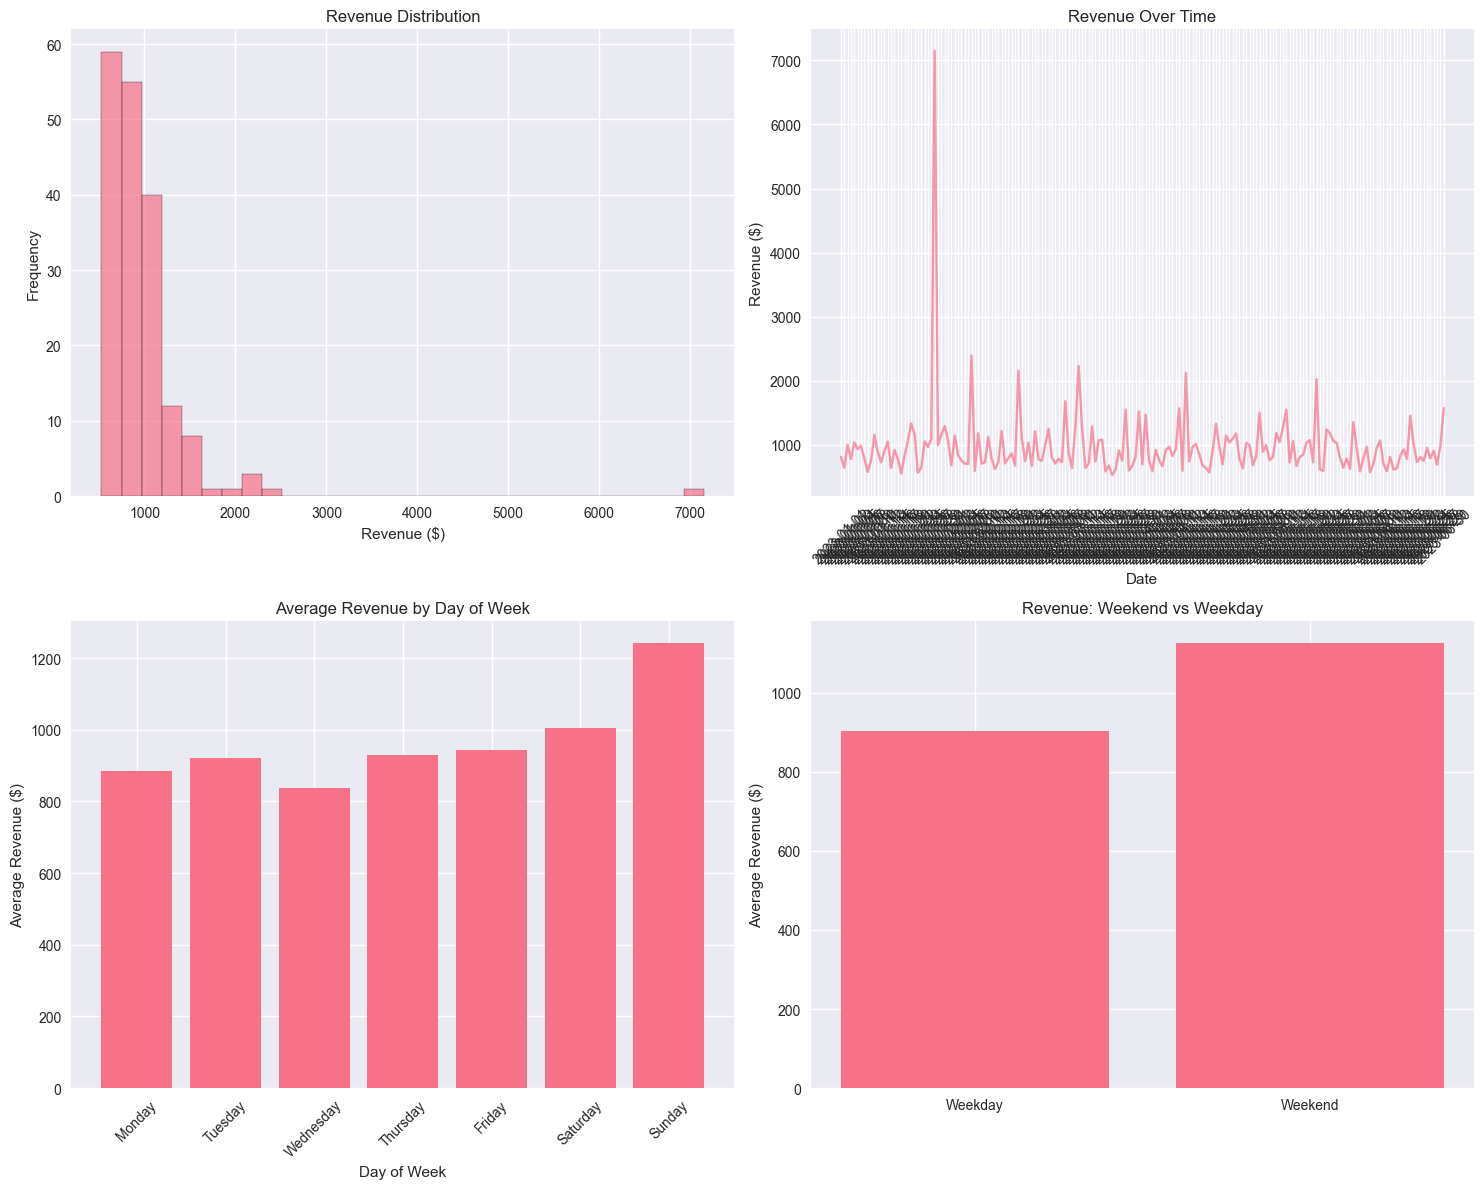

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(df['revenue'], bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Revenue Distribution')
axes[0, 0].set_xlabel('Revenue ($)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].plot(df['date'], df['revenue'], alpha=0.7)
axes[0, 1].set_title('Revenue Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = df.groupby('day_of_week')['revenue'].mean().reindex(weekday_order)
axes[1, 0].bar(range(len(revenue_by_day)), revenue_by_day.values)
axes[1, 0].set_title('Average Revenue by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Revenue ($)')
axes[1, 0].set_xticks(range(len(weekday_order)))
axes[1, 0].set_xticklabels(weekday_order, rotation=45)

weekend_revenue = df.groupby('is_weekend')['revenue'].mean()
axes[1, 1].bar(['Weekday', 'Weekend'], weekend_revenue.values)
axes[1, 1].set_title('Revenue: Weekend vs Weekday')
axes[1, 1].set_ylabel('Average Revenue ($)')

plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


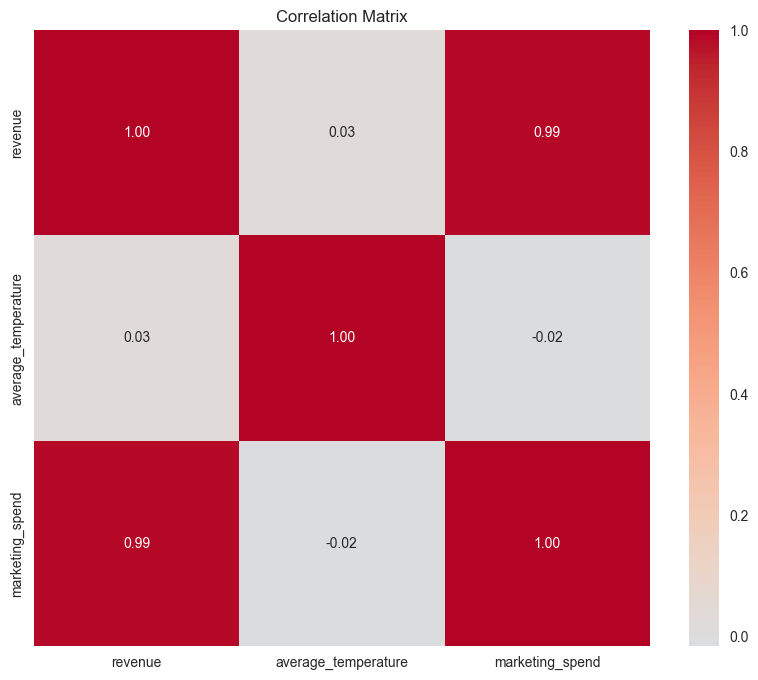

In [4]:
print("\n=== CORRELATION ANALYSIS ===")
numeric_cols = ['revenue', 'average_temperature', 'marketing_spend']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Revenue ($)')

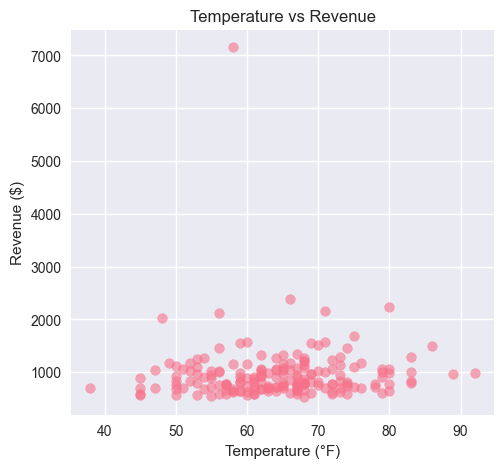

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['average_temperature'], df['revenue'], alpha=0.6)
plt.title('Temperature vs Revenue')
plt.xlabel('Temperature (°F)')
plt.ylabel('Revenue ($)')

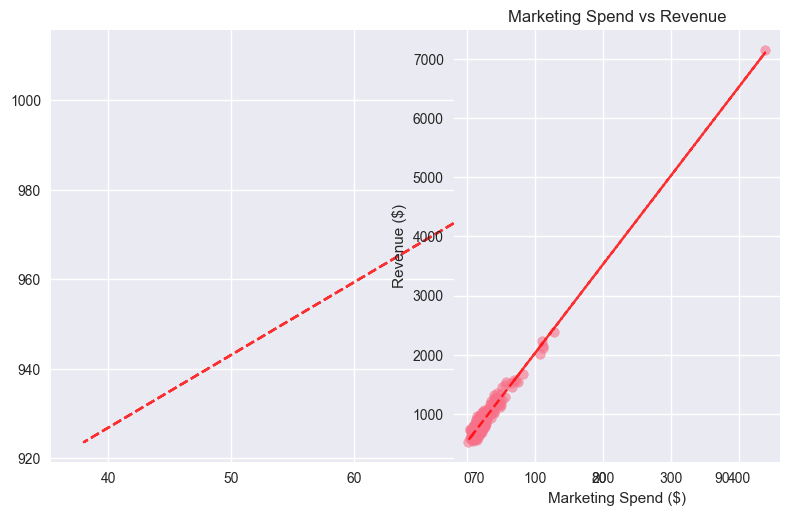

In [7]:
z = np.polyfit(df['average_temperature'], df['revenue'], 1)
p = np.poly1d(z)
plt.plot(df['average_temperature'], p(df['average_temperature']), "r--", alpha=0.8)

plt.subplot(1, 2, 2)
plt.scatter(df['marketing_spend'], df['revenue'], alpha=0.6)
plt.title('Marketing Spend vs Revenue')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('Revenue ($)')

z = np.polyfit(df['marketing_spend'], df['revenue'], 1)
p = np.poly1d(z)
plt.plot(df['marketing_spend'], p(df['marketing_spend']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [8]:
weekday_rev = df[df['is_weekend'] == 0]['revenue']
weekend_rev = df[df['is_weekend'] == 1]['revenue']
t_stat, p_value = stats.ttest_ind(weekday_rev, weekend_rev)
print(f"Weekend vs Weekday t-test: t={t_stat:.3f}, p={p_value:.4f}")

Weekend vs Weekday t-test: t=-2.404, p=0.0172


In [9]:
corr_temp, p_temp = stats.pearsonr(df['average_temperature'], df['revenue'])
corr_mkt, p_mkt = stats.pearsonr(df['marketing_spend'], df['revenue'])
print(f"Temperature correlation: r={corr_temp:.3f}, p={p_temp:.4f}")
print(f"Marketing correlation: r={corr_mkt:.3f}, p={p_mkt:.4f}")

Temperature correlation: r=0.027, p=0.7146
Marketing correlation: r=0.987, p=0.0000
